#!pip install cv2
#!pip install ImageDataGenerator
#!pip install plotly
!pip install seaborn


In [ ]:
#imports to be used in the program
import matplotlib.pyplot
import numpy as np # imports numpy
import os # imports operating system
import random # imports random
#from PIL import image #import PIL
import sklearn
import cv2
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from skimage.io import imread
import keras
import tensorflow as tf
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report


import cv2 #

#notebook stability
np.random.seed(42)




In [99]:
#loads train images from the folder

import os # imports the operating system

root = "train" # assigns root to train

frames = os.listdir(root)


len(frames) # check how many images there are


10000

00000.jpg
00001.jpg
00002.jpg
00003.jpg
00004.jpg
00005.jpg
00006.jpg
00007.jpg
00008.jpg
00009.jpg


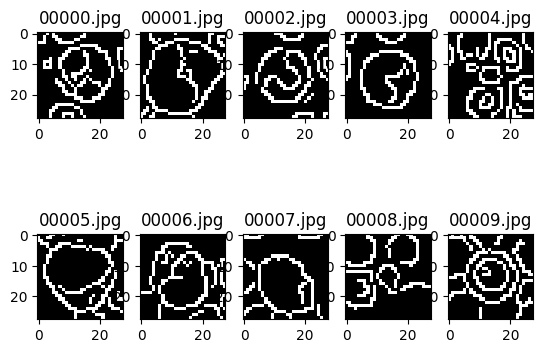

In [40]:
# test to see how the images look
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2

root = "test"
frames = os.listdir(root)

fig, axs = plt.subplots(nrows=2, ncols=5)
axs = axs.flatten()

# Loop over the first 10 frames
for i in range(10):
    print(frames[i])  # prints the number of frames
    filepath = os.path.join(root, frames[i])
    img = Image.open(filepath)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(cv2.imread(filepath), cv2.COLOR_BGR2GRAY)
    
    # Apply the median filter for smoothing
    med_filt = cv2.medianBlur(gray, 5)
    
    # Apply the Gaussian filter
    guss_filt = cv2.GaussianBlur(gray, (9, 9), 0)
    
    # Apply histogram normalization
    histo = cv2.equalizeHist(gray)
    
    # Apply edge detection filters
    edge = cv2.Canny(gray, 100, 200)
    
    axs[i].imshow(edge, cmap='gray')
    axs[i].set_title(frames[i])
    
plt.show()

In [ ]:
#Load Turn and apply filters to test images into a numpy array
from matplotlib.image import imread
import os
import numpy as np
import cv2

root = "test"
frames = os.listdir(root)

# Create an empty list to store the image arrays`
images = []

# Loop over the image files and apply filters
for frame in frames:
    # Read in the image file
    image = imread(os.path.join(root, frame))
    #Turn images into gray, apply gray filter
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # apply the median filter for smoothing
    med_filt = cv2.medianBlur(gray, 5)
    #apply gaussian filter
    guss_filt = cv2.GaussianBlur(gray,(9,9), 0)
    #Apply histo norm filter
    histo = cv2.equalizeHist(gray)
    
    #apply edge detection filters
    edge = cv2.Canny(gray,100,200)
    
    #validation_split
    validation_split = 0.8

   
    # Append the image array to the list
    images.append(image)

# Convert the list of image arrays to a numpy array
images_array = np.array(images)

print(images_array)


In [7]:
# Load train images + apply filters
from matplotlib.image import imread
import os
import numpy as np
import cv2

root = "train"
frames = os.listdir(root)

# Create an empty list to store the image arrays
images = []

# Loop over the image files and apply filters
for frame in frames:
    # Read in the image file
    image = imread(os.path.join(root, frame))
    # Turn images into gray, apply gray filter
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply the median filter for smoothing
    med_filt = cv2.medianBlur(gray, 5)
    # Apply Gaussian filter
    guss_filt = cv2.GaussianBlur(gray,(9,9), 0)
    # Apply histogram normalization
    histo = cv2.equalizeHist(gray)
    # Apply edge detection filters
    edge = cv2.Canny(gray,100,200)
    
    # Append the filtered image arrays to the list
    images.append(gray)
    images.append(med_filt)
    images.append(guss_filt)
    images.append(histo)
    images.append(edge)

# Convert the list of image arrays to a numpy array
images_array = np.array(images)

print(images_array)

[[[224 223 222 ... 193 192 190]
  [224 224 224 ... 190 192 193]
  [221 223 224 ... 186 192 197]
  ...
  [199 197 198 ... 199 200 200]
  [201 198 197 ... 203 204 204]
  [204 201 198 ... 205 206 207]]

 [[224 224 224 ... 192 192 192]
  [223 224 224 ... 190 192 192]
  [221 222 223 ... 190 192 193]
  ...
  [199 199 199 ... 201 201 201]
  [199 199 199 ... 202 204 204]
  [201 199 201 ... 204 204 205]]

 [[223 223 224 ... 188 190 190]
  [223 223 224 ... 187 189 190]
  [222 223 223 ... 186 188 189]
  ...
  [200 199 197 ... 201 201 201]
  [199 199 198 ... 202 202 202]
  [199 199 199 ... 202 202 202]]

 ...

 [[180 181 185 ... 192 190 189]
  [181 182 185 ... 189 188 187]
  [182 182 186 ... 184 183 183]
  ...
  [169 171 179 ... 223 223 223]
  [169 172 181 ... 223 223 223]
  [169 172 182 ... 223 223 223]]

 [[105 101  99 ... 155 141 108]
  [136 123 105 ... 153 138 118]
  [155 129 101 ... 140 127 114]
  ...
  [109  83  93 ... 218 218 226]
  [ 95  85 113 ... 218 218 218]
  [ 96  98 132 ... 218 218 2

In [ ]:
#assigns each train image to each label from 0 to 7 and creates a folfer for each for keras image generator
import os
import numpy as np
import matplotlib.pyplot as plt
import shutil

# Reads the text file with the labels and splits them into each individual part
with open('train.txt') as f:
    lines = f.readlines()

# Extract the file paths and labels from the lines in the train.txt file
file_paths = []
labels = []
for line in lines:
    line = line.strip().split()
    file_paths.append(line[0])
    labels.append(int(line[1]))

X = images_array
y = np.array(labels)

# Create folders for each label
for label in range(8):
    folder_name = f'label_{label}'
    os.makedirs(folder_name, exist_ok=True)

# Move images to their corresponding folders based on labels
for idx in range(len(file_paths)):
    label = y[idx]
    source_path = file_paths[idx]
    destination_folder = f'label_{label}'
    destination_path = os.path.join(destination_folder, os.path.basename(source_path))
    shutil.move(source_path, destination_path)

# Print the labels and corresponding images for labels 0 to 7
for label in range(8):
    label_folder = f'label_{label}'
    label_indices = np.where(y == label)[0]
    print(f"Label {label}:")
    for idx in label_indices:
        if label == y[idx]:
            image = X[idx]
            plt.imshow(image)
            plt.title(f"Image {file_paths[idx]}")
            plt.show()

print(y)





In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Reads the text file with the labels and splits them into each individual part
with open('train.txt') as f:
    lines = f.readlines()

# Extract the file paths and labels from the lines in the train.txt file
file_paths = []
labels = []
for line in lines:
    line = line.strip().split()
    file_paths.append(line[0])
    labels.append(int(line[1]))

# Load the corresponding images into an array
X = []
for file_path in file_paths:
    image = plt.imread(file_path)
    X.append(image)
X = np.array(X)
y = np.array(labels)

In [ ]:
# Print the labels and corresponding images for labels 0 to 7
for label in range(8):  # Iterate over labels 0 to 7
    label_indices = np.where(y == label)[0]
    print(f"Label {label}:")
    for idx in label_indices:
        if label == y[idx]:  # Check if the label of the current image matches the current label
            image = X[idx]
            plt.imshow(image)
            plt.title(f"Image {file_paths[idx]}")
            plt.show()

print(y)

In [3]:
#flow for image for image datagenerator
import os
from keras.preprocessing.image import ImageDataGenerator
import cv2

root = "train" # assigns root to train

train_images1 = os.listdir(root)

root2 = "test" # assigns root2 to test

test_images2 = os.listdir(root2)


len(train_images1) # check how many images there are

train_images = 'C:/Users/fairs/COM2028_CW_2023/COM2028_2023/train'
test_images = 'C:/Users/fairs/COM2028_CW_2023/COM2028_2023/test'
 

#train data generator + image processing technique
train_datagen = ImageDataGenerator(
    rescale=1./255,  # rescale pixel values to [0, 1]
    shear_range=0.2,  # apply shear transformation with angle range of 0.2 radians
    zoom_range=0.2,  # apply zoom transformation with a zoom range of 0.2
    horizontal_flip=True,  # flip images horizontally
    rotation_range=20,  # apply rotation with angle range of 20 degrees
    width_shift_range=0.2,  # apply width shift with width range of 0.2
    height_shift_range=0.2,  # apply height shift with height range of 0.2
    fill_mode='nearest',  # fill missing pixels with the nearest value
    channel_shift_range=0.2,  # apply channel shift with a range of 0.2
    validation_split=0.2  # specify the validation split as 20%
)                         

#test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(train_images,
                                                 target_size=(64,64),
                                                 #batch_size = 32,
                                                 color_mode='rgb',
                                                 shuffle=True,
                                                 subset ='training',
                                                 seed = None,
                                                 class_mode='categorical',
                                                 classes=(['label_0', 'label_1', 'label_2', 'label_3', 
                                                             'label_4', 'label_5', 'label_6', 'label_7']
                                                ))

test_set = test_datagen.flow_from_directory(test_images,
                                            target_size = (64,64),
                                            color_mode='rgb',
                                            shuffle=False,
                                            seed = None,
                                            class_mode = 'categorical',
                                           )




validation_set = train_datagen.flow_from_directory(train_images,
                                            target_size = (64,64),
                                            color_mode='rgb',
                                            shuffle=True,
                                            seed = None,
                                            subset='validation',       
                                            class_mode = 'categorical',
                                             classes=(['label_0', 'label_1', 'label_2', 'label_3', 
                                                             'label_4', 'label_5', 'label_6', 'label_7']
                                                    ))
                                        


Found 8004 images belonging to 8 classes.
Found 5000 images belonging to 1 classes.
Found 1996 images belonging to 8 classes.


In [6]:
#Building our Model
import tensorflow as tf
from tensorflow import keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.models import Sequential
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2,os,math
import numpy as np
from keras.optimizers import Adam

np.random.seed(42) # consistency for this model

num_classes_training_set = 8

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(64,64,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes_training_set, activation='softmax'))

opt = Adam(learning_rate=0.001)


model.summary()
plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 64)       

In [8]:
# Compile and train the model
model.compile(optimizer= opt, loss='categorical_crossentropy', metrics=['accuracy'])



In [9]:
history = model.fit(training_set, epochs=100,batch_size =32, validation_data=validation_set)

Epoch 1/100
251/251 [==============================] - 36s 144ms/step - loss: 0.4216 - accuracy: 0.8416 - val_loss: 0.3594 - val_accuracy: 0.8727
Epoch 22/100
251/251 [==============================] - 36s 143ms/step - loss: 0.4015 - accuracy: 0.8541 - val_loss: 0.3669 - val_accuracy: 0.8758
Epoch 23/100
251/251 [==============================] - 36s 143ms/step - loss: 0.3847 - accuracy: 0.8611 - val_loss: 0.3512 - val_accuracy: 0.8662
Epoch 24/100
251/251 [==============================] - 36s 143ms/step - loss: 0.3791 - accuracy: 0.8662 - val_loss: 0.3872 - val_accuracy: 0.8602
Epoch 25/100
251/251 [==============================] - 36s 145ms/step - loss: 0.3832 - accuracy: 0.8601 - val_loss: 0.3622 - val_accuracy: 0.8672
Epoch 26/100
251/251 [==============================] - 36s 145ms/step - loss: 0.3625 - accuracy: 0.8684 - val_loss: 0.3624 - val_accuracy: 0.8732
Epoch 27/100
251/251 [==============================] - 36s 144ms/step - loss: 0.3653 - accuracy: 0.8652 - val_loss: 0.

Epoch 77/100
251/251 [==============================] - 36s 145ms/step - loss: 0.2451 - accuracy: 0.9145 - val_loss: 0.2413 - val_accuracy: 0.9193
Epoch 78/100
251/251 [==============================] - 36s 144ms/step - loss: 0.2552 - accuracy: 0.9133 - val_loss: 0.2506 - val_accuracy: 0.9153
Epoch 79/100
251/251 [==============================] - 36s 144ms/step - loss: 0.2515 - accuracy: 0.9132 - val_loss: 0.2281 - val_accuracy: 0.9233
Epoch 80/100
251/251 [==============================] - 36s 145ms/step - loss: 0.2402 - accuracy: 0.9128 - val_loss: 0.2050 - val_accuracy: 0.9294
Epoch 81/100
251/251 [==============================] - 36s 145ms/step - loss: 0.2503 - accuracy: 0.9129 - val_loss: 0.2030 - val_accuracy: 0.9344
Epoch 82/100
251/251 [==============================] - 36s 145ms/step - loss: 0.2403 - accuracy: 0.9142 - val_loss: 0.2901 - val_accuracy: 0.8953
Epoch 83/100
251/251 [==============================] - 36s 145ms/step - loss: 0.2405 - accuracy: 0.9168 - val_loss: 0

In [10]:
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])
print("Loss:", history.history['loss'][-1])

Training Accuracy: 0.9166666865348816
Validation Accuracy: 0.9223446846008301
Loss: 0.23811328411102295


In [ ]:
#Training and Validation Accuracy Over Time, to determine overfitting and underfitting
import plotly.express as px

fig =px.line(
history.history,
    y=['accuracy', 'val_accuracy'],
    labels={'index': "Epoch", 'value': "Acc"},
    title="Training and Validation Accuracy Over Time"
)

fig.show()

In [ ]:
fig =px.line(
history.history,
    y=['loss', 'val_loss'],
    labels={'index': "Epoch", 'value': "Loss"},
    title="Training and Validation Loss Over Time"
)

fig.show()

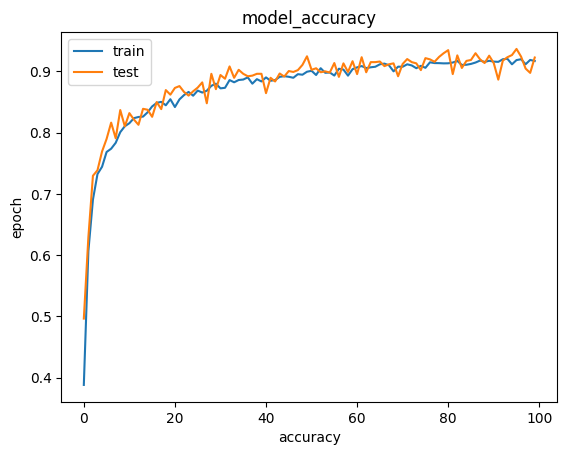

In [13]:
#Plot accuracy for the model
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')

plt.legend(['train','test'],loc='upper left')
plt.show()

In [14]:
model.save('fs00602(model2).h5') 

In [18]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

#np.random.seed(42)
#tf.random.set_seed(1)


#np.random.seed(42) # consistency for this model

model = keras.models.load_model('fs00602.h5')

final_result = []

predictions = model.predict(test_set)
predictions_indices = np.argmax(predictions, axis=1)
label_map = np.array([0,1,2,3,4,5,6,7])
predictions_int = label_map[predictions_indices]


print(predictions_int)





    


157/157 [==============================] - 5s 30ms/step
[1 3 6 ... 6 0 4]


In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
import tensorflow as tf
import seaborn as sns

class_labels = np.unique(training_set.classes)

y_true = training_set.classes
y_pred = np.argmax(model.predict(training_set), axis=-1)

cm = tf.math.confusion_matrix(y_true, y_pred)
clr = classification_report(y_ture, y_pred, target_names= y_true)

plt.figure(figsize =(8,8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap="Blues", cbar=False)
plt.xticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.yticks(ticks=np.arange(len(class_labels)), labels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:", clr)



             

In [17]:
import numpy as np
import pandas as pd

# Assuming you have a variable 'predictions' containing the data to be written into the text file
# Replace this with your actual data

# Create a list of filenames
filenames = ['test/{:06d}.jpg'.format(i - 1) for i in range(1, len(predictions_int) + 1)]

# Create a DataFrame with filenames and corresponding predictions
df = pd.DataFrame({'Filename': filenames, 'Prediction': predictions_int})

# Write the DataFrame into a text file called 'test.txt' with the desired format
df.to_csv('test2.txt', index=False, sep=' ', header=False, index_label=None)

print("Data has been written to test.txt successfully.")

     

Data has been written to test.txt successfully.
